# Finding Box plot
#### Two Methods
- By using third standard deviation
- By using IQR (Interquartile Range)

In [5]:
# importing somme basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
## Define the dataset
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
 

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

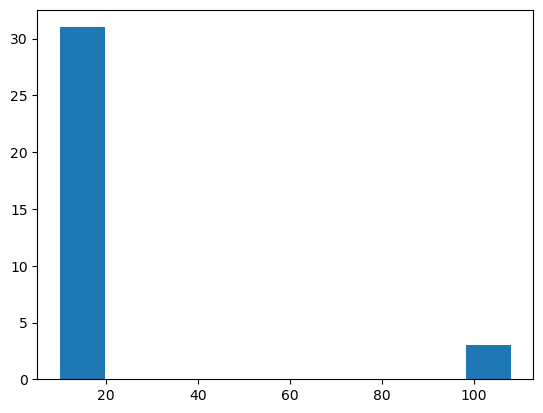

In [6]:
plt.hist(dataset)

In [7]:
##### 1. Method to find the outlier by using z-score formula
outliers=[]
def detect_outliers(data):
    threshold=3 ## 3rd standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [8]:
detect_outliers(dataset)

[102, 107, 108]

#### 2nd Technique IQR(Interquartile Range)

##### IQR STEPs
- Sort the data
- Calculate Q1(25%) and Q3(75%)
- IQR(Q3-Q1)
- Find the lower fence(q1-(1.5*iqr))
- find the upper fence(q3+(1.5*iqr))


In [9]:
## sort
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [11]:
## finding quartile
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [12]:
iqr = q3-q1
iqr

3.0

In [16]:
## find the lower fence and upper fence
lower_fence = q1-(1.5*iqr)
upper_fence = q3+(1.5*iqr)
print(lower_fence,upper_fence)

7.5 19.5


In [17]:
## below lower_fence -> consider outlier
## above upper_fence -> consider outlier


In [20]:
outlier=[]
for i in dataset:
    if i>upper_fence or i<lower_fence:
        outlier.append(i)


In [21]:
outlier

[102, 107, 108]

C:\Users\vivek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

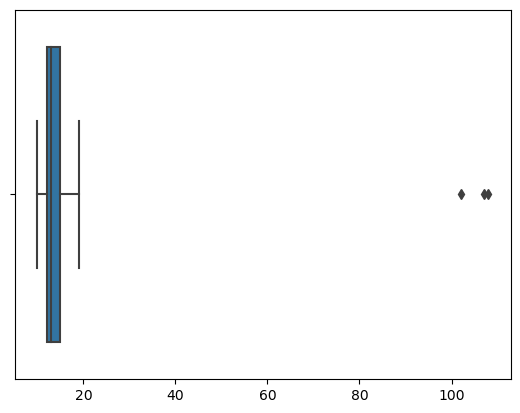

In [22]:
sns.boxplot(dataset)